# setting up the required library

In [2]:
pip install scipy


In [3]:
pip install pyedflib mne


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.2 MB/s eta 0:00:00


In [4]:

pip install PyWavelets


mount Google Drive to Colab environment

In [5]:
!pip install  torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [6]:
pip install tqdm


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import numpy as np
import pandas as pd
import pywt
import mne
from sklearn.decomposition import PCA
from mne.preprocessing import ICA
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import gc
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm
from tqdm import tqdm, tqdm_notebook

# pie chart for data

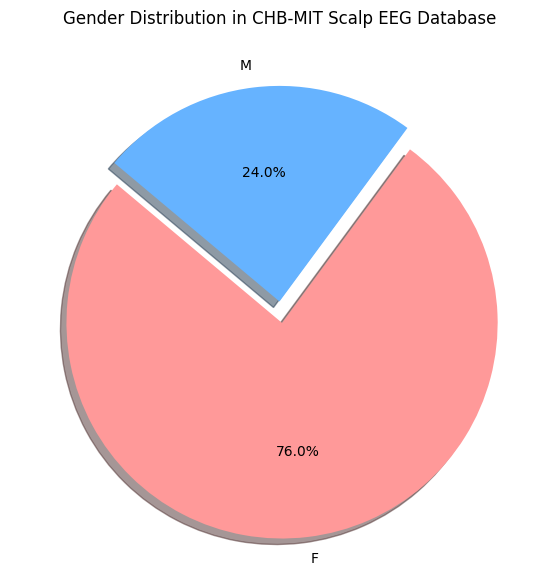

In [9]:


# Data from the user
data = {
    "chb01": ("F", 11),
    "chb02": ("M", 11),
    "chb03": ("F", 14),
    "chb04": ("F", 22),
    "chb05": ("F", 7),
    "chb06": ("F", 1.5),
    "chb07": ("F", 14.5),
    "chb08": ("M", 3.5),
    "chb09": ("F", 10),
    "chb10": ("M", 3),
    "chb11": ("F", 12),
    "chb12": ("F", 2),
    "chb13": ("F", 3),
    "chb14": ("F", 9),
    "chb15": ("F", 16),
    "chb16": ("F", 7),
    "chb17": ("F", 12),
    "chb18": ("F", 18),
    "chb19": ("F", 19),
    "chb20": ("F", 6),
    "chb21": ("F", 13),
    "chb22": ("F", 9),
    "chb23": ("M", 6),
    "chb24_01": ("M", 16),
    "chb24_02": ("M", 16)
}

# Counting the number of male and female subjects
gender_counts = {"F": 0, "M": 0}

for gender, age in data.values():
    gender_counts[gender] += 1

# Data for the pie chart
labels = gender_counts.keys()
sizes = gender_counts.values()
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Female)

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Gender Distribution in CHB-MIT Scalp EEG Database')
plt.show()


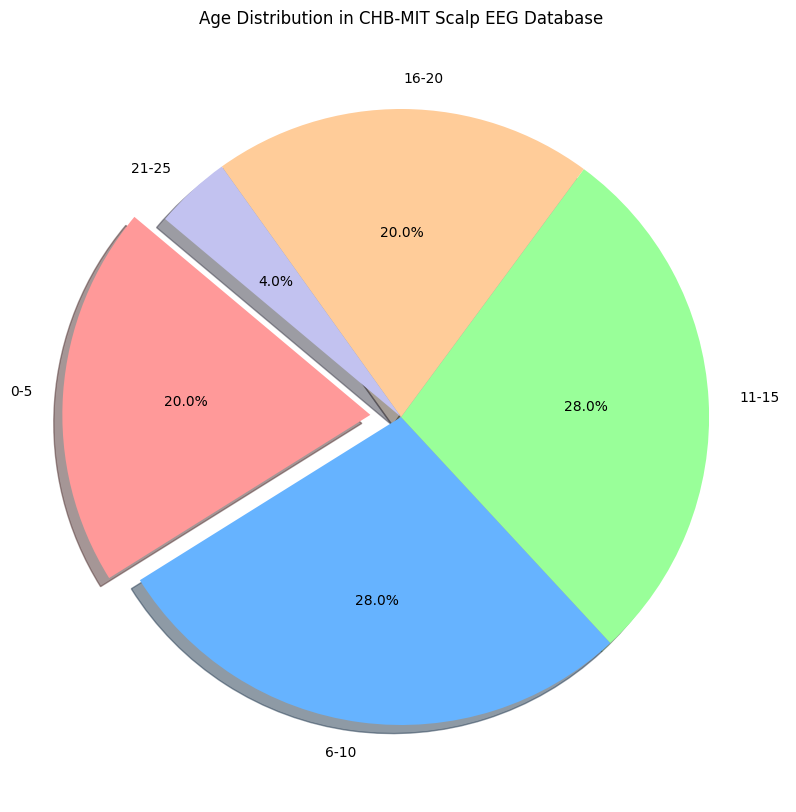

In [ ]:
# Counting the number of subjects in different age ranges
age_ranges = {
    "0-5": 0,
    "6-10": 0,
    "11-15": 0,
    "16-20": 0,
    "21-25": 0
}

for gender, age in data.values():
    if age <= 5:
        age_ranges["0-5"] += 1
    elif age <= 10:
        age_ranges["6-10"] += 1
    elif age <= 15:
        age_ranges["11-15"] += 1
    elif age <= 20:
        age_ranges["16-20"] += 1
    elif age <= 25:
        age_ranges["21-25"] += 1

# Data for the pie chart
labels = age_ranges.keys()
sizes = age_ranges.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
explode = (0.1, 0, 0, 0, 0)  # explode the 1st slice (0-5)

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Age Distribution in CHB-MIT Scalp EEG Database')
plt.show()

# reducing size without loosing importanyt information
CNN Model Modification:
Intermediate Layer Outputs: Extract features from an intermediate layer of a CNN that has fewer channels.

# 16 feauture
Reducing the output feature size from 64 to 16 in a CNN model impacts the model training and performance in several ways:

1. **Model Complexity and Training Time:**
   - **Reduced Complexity:** A smaller feature size results in a simpler model with fewer parameters. This can lead to faster training times since the model has less data to process in the subsequent layers.
   - **Reduced Training Time:** With fewer features, each epoch of training will take less time, and the model might converge more quickly.

2. **Generalization:**
   - **Improved Generalization:** A simpler model with fewer parameters is less prone to overfitting, especially if the dataset is small or noisy. By reducing the number of features, the model might generalize better to unseen data.
   - **Risk of Underfitting:** However, there's a risk that the reduced feature set may not capture all the relevant information from the data, leading to underfitting, where the model fails to learn the underlying patterns effectively.

3. **Performance:**
   - **Potential Loss of Information:** Reducing the feature size can result in the loss of important information that was previously captured by the additional features. This might negatively impact the model's performance, particularly if the original 64 features included critical details about the data.
   - **Improved Performance:** If the original 64 features included redundant or irrelevant information, reducing the feature size can lead to a more focused and efficient model, potentially improving performance.

4. **Memory Usage:**
   - **Reduced Memory Usage:** A smaller feature size reduces the memory footprint during both training and inference, which is beneficial when working with large datasets or deploying models on resource-constrained devices.

5. **Feature Interpretability:**
   - **Easier Interpretation:** With fewer features, it may be easier to interpret and understand the model's decisions, especially in applications where feature importance and interpretability are crucial.

In summary, reducing the output feature size to 16 can lead to a simpler and faster model with better generalization properties.

#  Define the path + output directory

In [13]:

# path to the files
edf_dir_path = '/content/drive/MyDrive/Epileptic_Seizure_Classification_Project/Dataset/chb-mit-scalp-eeg-database-1.0.0/chb08'
output_dir_path = '/content/drive/MyDrive/Epileptic_Seizure_Classification_Project/cnn_Extracted_Features_/chb08'

os.makedirs(output_dir_path, exist_ok=True)

# List all EDF files
edf_files = [f for f in sorted(os.listdir(edf_dir_path)) if f.endswith('.edf') and f in ['chb08_02.edf','chb08_04.edf','chb08_05.edf','chb08_10.edf','chb08_11.edf','chb08_12.edf','chb08_13.edf','chb08_18.edf','chb08_21.edf']]


**Modified** Convolutional Neural Network Architecture for EEG Signal Classification

Here's a detailed description of the `ModifiedCNN` model:

### Layers and Their Functions

1. **Convolutional Layer 1 (`conv1`):**
   - **Input Shape:** `(batch_size, 1, 23)`
   - **Operation:** Applies 16 filters of size 3 with stride 1 and padding 1.
   - **Output Shape:** `(batch_size, 16, 23)`

2. **Max Pooling Layer 1 (`pool`):**
   - **Operation:** Applies a max-pooling operation with a kernel size of 2 and stride of 2.
   - **Output Shape:** `(batch_size, 16, 11)`

3. **Convolutional Layer 2 (`conv2`):**
   - **Input Shape:** `(batch_size, 16, 11)`
   - **Operation:** Applies 32 filters of size 3 with stride 1 and padding 1.
   - **Output Shape:** `(batch_size, 32, 11)`

4. **Max Pooling Layer 2 (`pool`):**
   - **Operation:** Applies a max-pooling operation with a kernel size of 2 and stride of 2.
   - **Output Shape:** `(batch_size, 32, 5)`

5. **Convolutional Layer 3 (`conv3`):**
   - **Input Shape:** `(batch_size, 32, 5)`
   - **Operation:** Applies 16 filters of size 3 with stride 1 and padding 1.
   - **Output Shape:** `(batch_size, 16, 5)`

6. **Max Pooling Layer 3 (`pool`):**
   - **Operation:** Applies a max-pooling operation with a kernel size of 2 and stride of 2.
   - **Output Shape:** `(batch_size, 16, 2)`

7. **Flatten Layer:**
   - **Operation:** Flattens the tensor to a shape suitable for fully connected layers.
   - **Output Shape:** `(batch_size, 32)` (since `16 * 2 = 32`)

8. **Fully Connected Layer 1 (`fc1`):**
   - **Input Shape:** `(batch_size, 32)`
   - **Operation:** Applies a linear transformation to produce 128 features.
   - **Output Shape:** `(batch_size, 128)`

9. **Fully Connected Layer 2 (`fc2`):**
   - **Input Shape:** `(batch_size, 128)`
   - **Operation:** Applies a linear transformation to produce 16 features.
   - **Output Shape:** `(batch_size, 16)`


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Initialize ICA and PCA parameters
ica = ICA(n_components=23, random_state=97, max_iter=400)
pca = PCA(n_components=16)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1)  # Additional conv layer
        self.fc1 = nn.Linear(16 * (23 // 2 // 2 // 2), 128)  # Adjust input size
        self.fc2 = nn.Linear(128, 16)  # Adjust output size to 16

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))  # Additional conv layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = ModifiedCNN().to(device)


# List of files known to have seizures

In [15]:


seizure_files = [
    'chb01/chb01_03.edf', 'chb01/chb01_04.edf', 'chb01/chb01_15.edf', 'chb01/chb01_16.edf',
    'chb01/chb01_18.edf', 'chb01/chb01_21.edf', 'chb01/chb01_26.edf', 'chb02/chb02_16.edf',
    'chb02/chb02_16+.edf', 'chb02/chb02_19.edf', 'chb03/chb03_01.edf', 'chb03/chb03_02.edf',
    'chb03/chb03_03.edf', 'chb03/chb03_04.edf', 'chb03/chb03_34.edf', 'chb03/chb03_35.edf',
    'chb03/chb03_36.edf', 'chb04/chb04_05.edf', 'chb04/chb04_08.edf', 'chb04/chb04_28.edf',
    'chb05/chb05_06.edf', 'chb05/chb05_13.edf', 'chb05/chb05_16.edf', 'chb05/chb05_17.edf',
    'chb05/chb05_22.edf', 'chb06/chb06_01.edf', 'chb06/chb06_04.edf', 'chb06/chb06_09.edf',
    'chb06/chb06_10.edf', 'chb06/chb06_13.edf', 'chb06/chb06_18.edf', 'chb06/chb06_24.edf',
    'chb07/chb07_12.edf', 'chb07/chb07_13.edf', 'chb07/chb07_18.edf', 'chb08/chb08_02.edf',
    'chb08/chb08_05.edf', 'chb08/chb08_11.edf', 'chb08/chb08_13.edf', 'chb08/chb08_21.edf',
    'chb09/chb09_06.edf', 'chb09/chb09_08.edf', 'chb09/chb09_19.edf', 'chb10/chb10_12.edf',
    'chb10/chb10_20.edf', 'chb10/chb10_27.edf', 'chb10/chb10_30.edf', 'chb10/chb10_31.edf',
    'chb10/chb10_38.edf', 'chb10/chb10_89.edf', 'chb11/chb11_82.edf', 'chb11/chb11_92.edf',
    'chb11/chb11_99.edf', 'chb12/chb12_06.edf', 'chb12/chb12_08.edf', 'chb12/chb12_09.edf',
    'chb12/chb12_10.edf', 'chb12/chb12_11.edf', 'chb12/chb12_23.edf', 'chb12/chb12_27.edf',
    'chb12/chb12_28.edf', 'chb12/chb12_29.edf', 'chb12/chb12_33.edf', 'chb12/chb12_36.edf',
    'chb12/chb12_38.edf', 'chb12/chb12_42.edf', 'chb13/chb13_19.edf', 'chb13/chb13_21.edf',
    'chb13/chb13_40.edf', 'chb13/chb13_55.edf', 'chb13/chb13_58.edf', 'chb13/chb13_59.edf',
    'chb13/chb13_60.edf', 'chb13/chb13_62.edf', 'chb14/chb14_03.edf', 'chb14/chb14_04.edf',
    'chb14/chb14_06.edf', 'chb14/chb14_11.edf', 'chb14/chb14_17.edf', 'chb14/chb14_18.edf',
    'chb14/chb14_27.edf', 'chb15/chb15_06.edf', 'chb15/chb15_10.edf', 'chb15/chb15_15.edf',
    'chb15/chb15_17.edf', 'chb15/chb15_20.edf', 'chb15/chb15_22.edf', 'chb15/chb15_28.edf',
    'chb15/chb15_31.edf', 'chb15/chb15_40.edf', 'chb15/chb15_46.edf', 'chb15/chb15_49.edf',
    'chb15/chb15_52.edf', 'chb15/chb15_54.edf', 'chb15/chb15_62.edf', 'chb16/chb16_10.edf',
    'chb16/chb16_11.edf', 'chb16/chb16_14.edf', 'chb16/chb16_16.edf', 'chb16/chb16_17.edf',
    'chb16/chb16_18.edf', 'chb17/chb17a_03.edf', 'chb17/chb17a_04.edf', 'chb17/chb17b_63.edf',
    'chb18/chb18_29.edf', 'chb18/chb18_30.edf', 'chb18/chb18_31.edf', 'chb18/chb18_32.edf',
    'chb18/chb18_35.edf', 'chb18/chb18_36.edf', 'chb19/chb19_28.edf', 'chb19/chb19_29.edf',
    'chb19/chb19_30.edf', 'chb20/chb20_12.edf', 'chb20/chb20_13.edf', 'chb20/chb20_14.edf',
    'chb20/chb20_15.edf', 'chb20/chb20_16.edf', 'chb20/chb20_68.edf', 'chb21/chb21_19.edf',
    'chb21/chb21_20.edf', 'chb21/chb21_21.edf', 'chb21/chb21_22.edf', 'chb22/chb22_20.edf',
    'chb22/chb22_25.edf', 'chb22/chb22_38.edf', 'chb23/chb23_06.edf', 'chb23/chb23_08.edf',
    'chb23/chb23_09.edf', 'chb24/chb24_01.edf', 'chb24/chb24_03.edf', 'chb24/chb24_04.edf',
    'chb24/chb24_06.edf', 'chb24/chb24_07.edf', 'chb24/chb24_09.edf', 'chb24/chb24_11.edf',
    'chb24/chb24_13.edf', 'chb24/chb24_14.edf', 'chb24/chb24_15.edf', 'chb24/chb24_17.edf',
    'chb24/chb24_21.edf'
]

# Function to check if a file contains seizures
def has_seizure(edf_file):
    return edf_file in seizure_files

# Normalization
 can have a significant impact on the accuracy of your machine learning models, especially when using techniques like PCA and CNNs. By normalizing the data, you ensure that each feature contributes equally to the analysis, preventing features with larger scales from dominating the results.
 # Quantization: The features are quantized to 32-bit integers,

The use of PCA both before and after the CNN in the processing pipeline serves distinct purposes at each stage, enhancing the effectiveness of the feature extraction and dimensionality reduction processes.

### PCA Before CNN

1. **Dimensionality Reduction**: EEG signals, after being transformed by CWT, can result in a very high-dimensional dataset. PCA is applied to reduce the number of features while retaining the most important information. This makes the data more manageable for the CNN, reducing the computational burden and memory requirements.
   
2. **Noise Reduction**: PCA help in filtering out noise by focusing on the principal components that capture the most variance in the data.

3. **Improved Training Efficiency**: By reducing the input dimensionality, PCA helps in speeding up the training

### PCA After CNN

1. **Feature Compaction**: After the CNN extracts features from the input data, the resulting feature set might still be high-dimensional. Applying PCA at this stage further compacts these features.

2. **Removing Redundancies**: CNNs can sometimes produce redundant features. PCA helps in eliminating such redundancies by retaining only the components that capture the most variance.

3. **Facilitating Further Analysis**: The final, reduced-dimensional feature set produced by PCA is more suitable for subsequent analysis, visualization, and modeling. It ensures that the most important features are retained.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Function to process a single EDF file
def process_edf_file(edf_file):
    edf_file_path = os.path.join(edf_dir_path, edf_file)

    # Load the EDF file
    raw = mne.io.read_raw_edf(edf_file_path, preload=True)

    # Get signal parameters
    signal_length = raw.n_times
    sfreq = raw.info['sfreq']
    n_channels = len(raw.ch_names)
    signal_labels = raw.ch_names

    epoch_length_samples = int(360 * sfreq)
    num_epochs = signal_length // epoch_length_samples

    batch_size = 20  # Number of epochs to process in one batch
    cnn_features = []

    for batch_start in range(0, num_epochs, batch_size):
        batch_end = min(batch_start + batch_size, num_epochs)
        batch_data = []

        for epoch_idx in range(batch_start, batch_end):
            start_idx = epoch_idx * epoch_length_samples
            end_idx = (epoch_idx + 1) * epoch_length_samples
            if end_idx > signal_length:
                end_idx = signal_length

            signals = raw.get_data(start=start_idx, stop=end_idx)

            info = mne.create_info(ch_names=signal_labels, sfreq=sfreq, ch_types='eeg')
            raw_epoch = mne.io.RawArray(signals, info)
            raw_epoch.filter(1., 50., fir_design='firwin')

            scales = range(1, 128)
            cwt_data = np.zeros((n_channels, len(scales), signals.shape[1]))

            # Compute CWT using PyTorch
            signals_torch = torch.tensor(raw_epoch.get_data(), dtype=torch.float32).to(device)
            for i in range(n_channels):
                cwt_result, _ = pywt.cwt(signals_torch[i].cpu().numpy(), scales, 'morl')
                cwt_data[i, :, :] = cwt_result

            cwt_data = torch.tensor(cwt_data, dtype=torch.float32).to(device)

            if torch.any(torch.isnan(cwt_data)) or torch.any(torch.isinf(cwt_data)):
                cwt_data = torch.nan_to_num(cwt_data)

            cwt_data_reshaped = cwt_data.view(n_channels * len(scales), signals.shape[1]).T

            if torch.any(torch.isnan(cwt_data_reshaped)) or torch.any(torch.isinf(cwt_data_reshaped)):
                cwt_data_reshaped = torch.nan_to_num(cwt_data_reshaped)

            # Apply ICA (still on CPU)
            ica.fit(raw_epoch)

            # Normalize the data before PCA
            scaler = StandardScaler()
            cwt_data_normalized = scaler.fit_transform(cwt_data_reshaped.cpu().numpy())

            # Apply PCA
            pca_data = pca.fit_transform(cwt_data_normalized)
            batch_data.append(pca_data)

            print(f"File {edf_file} - Epoch {epoch_idx + 1}/{num_epochs}: Explained variance ratio by first 20 components: {pca.explained_variance_ratio_}")

            # Clear variables to free memory
            del raw_epoch
            del cwt_data
            del cwt_data_reshaped
            del cwt_data_normalized
            gc.collect()

        batch_data_array = np.vstack(batch_data)
        pca_data_tensor = torch.tensor(batch_data_array, dtype=torch.float32).unsqueeze(2).to(device)

        # Create DataLoader for the PCA data
        dataset = TensorDataset(pca_data_tensor)
        data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

        # Extract features using the CNN model
        cnn_model.eval()
        with torch.no_grad():
            for batch in data_loader:
                inputs = batch[0].permute(0, 2, 1)  # Change the shape to (batch_size, channels, length)
                outputs = cnn_model(inputs)
                cnn_features.append(outputs.cpu().numpy())

    cnn_features_array = np.vstack(cnn_features)

    del raw
    del cnn_features
    del batch_data
    del batch_data_array
    gc.collect()

    # Further reduce the features using PCA
    final_pca = PCA(n_components=16)
    reduced_features = final_pca.fit_transform(cnn_features_array)

    # Quantize the features to 32-bit integers
    reduced_features_quantized = np.round(reduced_features * 1e6).astype(np.int32)

    return reduced_features_quantized

# Process all EDF files and save the extracted features separately
for edf_file in edf_files:
    features = process_edf_file(edf_file)
    has_seizure_label = 1 if has_seizure(edf_file) else 0
    features_with_label = np.column_stack((features, np.full((features.shape[0], 1), has_seizure_label)))
    output_file_path = os.path.join(output_dir_path, f'cnn_features_{os.path.splitext(edf_file)[0]}.csv')
    pd.DataFrame(features_with_label).to_csv(output_file_path, index=False, header=False)  # Save without header
    print(f"Processed and saved features for file {edf_file}.")

print("Processing and feature extraction complete for all EDF files.")


Extracting EDF parameters from /content/drive/MyDrive/Epileptic_Seizure_Classification_Project/Dataset/chb-mit-scalp-eeg-database-1.0.0/chb08/chb08_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-16-0be77fa5ad3f>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)


Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 12.8s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.9) and smallest (1.2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 1/10: Explained variance ratio by first 20 components: [0.07174517 0.0488586  0.04615519 0.04226756 0.03893512 0.03467034
 0.02909116 0.02554482 0.02477768 0.02428774 0.02097045 0.02033443
 0.01983314 0.01741438 0.01639544 0.01602361]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 6.0s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6) and smallest (2.6e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 2/10: Explained variance ratio by first 20 components: [0.08573123 0.06802391 0.04657226 0.04328689 0.0409691  0.03303167
 0.02666186 0.02620047 0.02506332 0.024174   0.0219404  0.01961695
 0.01779571 0.01727106 0.0165063  0.01473411]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 5.5s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.2) and smallest (3.9e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 3/10: Explained variance ratio by first 20 components: [0.09854856 0.08104787 0.06823949 0.05162116 0.03629365 0.03354271
 0.03080027 0.02748726 0.0227205  0.02013669 0.01927458 0.01849662
 0.01718321 0.01656384 0.01484664 0.01468285]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 7.6s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.9) and smallest (2.1e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 4/10: Explained variance ratio by first 20 components: [0.09655449 0.06655546 0.05869597 0.04984993 0.03484421 0.03328721
 0.0303522  0.0279529  0.02485162 0.02276379 0.01949042 0.01911999
 0.01835669 0.01671088 0.01573427 0.01478713]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 15.9s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.9) and smallest (4.6e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 5/10: Explained variance ratio by first 20 components: [0.10890267 0.07691036 0.06143842 0.05445441 0.03720253 0.03280048
 0.02998387 0.02726294 0.02383924 0.02222331 0.02030816 0.01907739
 0.01613066 0.01522352 0.01452478 0.01397148]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 8.9s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (4.5e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 6/10: Explained variance ratio by first 20 components: [0.10038013 0.06835721 0.05991642 0.05134333 0.03357264 0.03147605
 0.02987191 0.0273529  0.02546426 0.02211439 0.01915873 0.01837222
 0.01716785 0.01651718 0.01639622 0.01473593]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 9.4s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.4) and smallest (1e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 7/10: Explained variance ratio by first 20 components: [0.12193185 0.07260383 0.06179695 0.05299458 0.03817293 0.03431334
 0.03231535 0.02530356 0.02232544 0.02132546 0.01911989 0.01828679
 0.01653345 0.01574297 0.01434057 0.01413837]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 12.3s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.5) and smallest (5.5e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 8/10: Explained variance ratio by first 20 components: [0.07674202 0.06576615 0.04884302 0.0425985  0.03749633 0.03254714
 0.03237795 0.02927089 0.02543664 0.02391624 0.02317924 0.02181345
 0.01954665 0.01878061 0.01849959 0.01668699]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 13.0s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.7) and smallest (8.9e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 9/10: Explained variance ratio by first 20 components: [0.07196731 0.05604906 0.04649981 0.04276051 0.0380791  0.03551238
 0.03260542 0.02856288 0.02628922 0.02433758 0.02393745 0.02043881
 0.01998361 0.01962135 0.01722038 0.0163979 ]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 6.7s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.9) and smallest (1.7e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_02.edf - Epoch 10/10: Explained variance ratio by first 20 components: [0.0910465  0.06994395 0.04872196 0.04769494 0.03897327 0.03350213
 0.02935393 0.02668238 0.02626266 0.02467185 0.02385569 0.02176583
 0.01925426 0.01746139 0.01598189 0.01509867]
Processed and saved features for file chb08_02.edf.
Extracting EDF parameters from /content/drive/MyDrive/Epileptic_Seizure_Classification_Project/Dataset/chb-mit-scalp-eeg-database-1.0.0/chb08/chb08_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-16-0be77fa5ad3f>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)


Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 16.8s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.9) and smallest (1.2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 1/10: Explained variance ratio by first 20 components: [0.08597598 0.05483925 0.05407704 0.04404362 0.03416214 0.0332126
 0.03005057 0.02770596 0.02580113 0.02461563 0.02135115 0.02065327
 0.01902745 0.01797625 0.01789599 0.01597964]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 7.7s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.6) and smallest (7.9e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 2/10: Explained variance ratio by first 20 components: [0.08683023 0.06449707 0.05856298 0.0450256  0.035228   0.03246446
 0.02993288 0.02902124 0.02704935 0.02344392 0.02116765 0.01970741
 0.01836124 0.01772051 0.01658504 0.01603234]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 17.4s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.5) and smallest (5.8e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 3/10: Explained variance ratio by first 20 components: [0.08523858 0.06304925 0.05331333 0.04474628 0.03658456 0.03358278
 0.0295148  0.02801816 0.0252634  0.02270065 0.02211976 0.02076481
 0.01871494 0.01773908 0.01722884 0.01619963]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 19.1s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.6) and smallest (3.5e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 4/10: Explained variance ratio by first 20 components: [0.08348841 0.05932042 0.05265449 0.04381797 0.03521754 0.03391115
 0.03023189 0.02825844 0.02650762 0.02439571 0.0209853  0.02022848
 0.01832887 0.01773402 0.01682037 0.01588795]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 21.6s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.8) and smallest (2.2e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 5/10: Explained variance ratio by first 20 components: [0.08186721 0.06323597 0.05614993 0.04432003 0.03731992 0.03393436
 0.03138688 0.0287002  0.02625118 0.02432707 0.02119551 0.02013572
 0.01961482 0.01855723 0.01575986 0.01574453]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 14.0s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.1) and smallest (1.9e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 6/10: Explained variance ratio by first 20 components: [0.08388778 0.05696204 0.05552706 0.04449295 0.03300377 0.03227625
 0.03157734 0.02729177 0.02603514 0.02339139 0.02239579 0.01972675
 0.0195853  0.01824755 0.01760743 0.0172851 ]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 14.0s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.4) and smallest (1.1e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 7/10: Explained variance ratio by first 20 components: [0.09319439 0.05978861 0.05148812 0.04446835 0.03781382 0.03497715
 0.02889462 0.02786452 0.02509504 0.02256499 0.02178061 0.01939415
 0.01879903 0.01788615 0.01686133 0.01647463]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 5.7s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.3) and smallest (6.7e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 8/10: Explained variance ratio by first 20 components: [0.09558355 0.06246036 0.05393309 0.03663896 0.03578488 0.03315036
 0.03169204 0.0288101  0.025249   0.0223093  0.02100287 0.02004857
 0.0190906  0.01845534 0.0170634  0.01646625]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 8.9s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.7) and smallest (2.5e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 9/10: Explained variance ratio by first 20 components: [0.09324666 0.06809341 0.04866938 0.04382737 0.03804066 0.03349511
 0.02897395 0.02676    0.02601403 0.02377224 0.02178254 0.02044352
 0.01835126 0.01713924 0.01579706 0.01540935]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 9.9s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.8) and smallest (2.9e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_04.edf - Epoch 10/10: Explained variance ratio by first 20 components: [0.08892387 0.05909866 0.04678725 0.04526798 0.03383158 0.03266972
 0.02983465 0.02869046 0.02546026 0.02473032 0.02230081 0.01988957
 0.01960594 0.0185992  0.01669297 0.01573771]
Processed and saved features for file chb08_04.edf.
Extracting EDF parameters from /content/drive/MyDrive/Epileptic_Seizure_Classification_Project/Dataset/chb-mit-scalp-eeg-database-1.0.0/chb08/chb08_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-16-0be77fa5ad3f>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)


Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 10.3s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.7) and smallest (1.6e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 1/10: Explained variance ratio by first 20 components: [0.08473199 0.06176958 0.05390428 0.04540382 0.03535355 0.03181866
 0.03103773 0.0288462  0.02641415 0.02568196 0.02136897 0.02057643
 0.01864973 0.01697131 0.01644831 0.01544377]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 12.8s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.3) and smallest (4.1e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 2/10: Explained variance ratio by first 20 components: [0.08955421 0.06356286 0.05343454 0.04595707 0.03489314 0.03215216
 0.02907399 0.02755611 0.026421   0.02576168 0.0217158  0.02022918
 0.01855265 0.01667167 0.01653208 0.01595572]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 14.4s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.4) and smallest (6e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 3/10: Explained variance ratio by first 20 components: [0.08820504 0.06530935 0.046001   0.04035678 0.03660978 0.03427322
 0.0331798  0.02755872 0.02607968 0.02219459 0.02159858 0.01982354
 0.01901992 0.01805183 0.01665124 0.0162028 ]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 8.5s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.4) and smallest (7.9e-33) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 4/10: Explained variance ratio by first 20 components: [0.10267393 0.07334102 0.06359627 0.04992945 0.03477728 0.03353576
 0.03247534 0.02587405 0.02421499 0.01991182 0.01892952 0.01868455
 0.01735601 0.01659589 0.01403622 0.01382634]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 6.1s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (3e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 5/10: Explained variance ratio by first 20 components: [0.10793416 0.08409023 0.07022474 0.05358967 0.03893734 0.03226207
 0.02917768 0.02865933 0.02060554 0.02032156 0.01889858 0.01768581
 0.01605528 0.01482034 0.01438317 0.01253156]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 11.4s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (7) and smallest (1.5e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 6/10: Explained variance ratio by first 20 components: [0.08433455 0.0766145  0.05285339 0.0443849  0.03400484 0.03169433
 0.02920201 0.02762633 0.02379887 0.0223791  0.01940032 0.0180712
 0.01787183 0.01603609 0.0151743  0.01448762]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 23 components
Fitting ICA took 6.8s.


<ipython-input-16-0be77fa5ad3f>:58: RuntimeWarning: Using n_components=23 (resulting in n_components_=23) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.3) and smallest (3e-32) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(raw_epoch)


File chb08_05.edf - Epoch 7/10: Explained variance ratio by first 20 components: [0.10497232 0.0861891  0.07512245 0.05486013 0.03921909 0.0363882
 0.0289491  0.0276357  0.02094894 0.02061659 0.02011237 0.01840207
 0.01752637 0.01548386 0.01406971 0.01294768]
Creating RawArray with float64 data, n_channels=23, n_times=92160
    Range : 0 ... 92159 =      0.000 ...   359.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


# compare the statistics of two of the feature files.

We will:

*   Load two files.
*   Compare basic statistics such as mean, standard deviation, and value ranges.
*   Check the distribution of classes in both files.
   



In [ ]:

# Define paths
output_dir_path = '/content/drive/MyDrive/Epileptic_Seizure_Classification_Project/cnn_Extracted_Features_/chb01'
feature_files = [os.path.join(output_dir_path, f) for f in os.listdir(output_dir_path) if f.startswith('cnn_features_') and f.endswith('.csv')]

# Function to load and describe a file
def load_and_describe(file_path):
    df = pd.read_csv(file_path, header=None)
    description = df.describe()
    class_distribution = df.iloc[:, -1].value_counts()
    return description, class_distribution, df

# Load and describe two files
file1_path = feature_files[0]
file2_path = feature_files[1]

description1, class_distribution1, df1 = load_and_describe(file1_path)
description2, class_distribution2, df2 = load_and_describe(file2_path)

# Print descriptions and class distributions
print(f"Statistics for {file1_path}:\n")
print(description1)
print("\nClass Distribution:")
print(class_distribution1)

print(f"\n\nStatistics for {file2_path}:\n")
print(description2)
print("\nClass Distribution:")
print(class_distribution2)

# Compare columns if they are different
if not df1.equals(df2):
    print("\n\nColumns are not the same, ")

